# Calculation of Ohmic Diffusion Timescale in a WD

First calculate the electric conductivity $\sigma$ in degenerate and non-degenerate matter.
Follows Spitzer 1962 and Wendell et al. 1987, ApJ 313:284

The electrical conductivity is set by the collisions between the
electrons and ions (see, e.g., Yakovlev & Urpin 1980; Itoh
et al. 1983; Schatz et al. 1999). Unlike within the degenerate
core, the electrical conductivity is dependent on the temperature in the surface layers, where the electrons are nondegenerate. As the B-WD mass increases, the increase in conductivity is offset by the decreasing radius (Bhattacharya et al. 2022).
Note that Hall drift likely dominates diffusion processes inside the degenerate cores, while Ohmic diffusion dominates the outer regions. Ambipolar diffusion only becomes important for very large fields (B>10$^{14}$ G).

We will compare to the Cumming 2002 scalings:

$t_{Ohm} \approx 7\times10^{10} \, \rho_{c,6}^{1/3} R_4^{1/2} (\rho_{avg}/\rho_{c}) \, yr$

$t_{Hall} \approx 5\times10^{10} \, \ell^8 B_{0,14}^{-1} T^2_{c,7} \rho_{c,10} \, yr$


For the calculation of the local magnetic diffusivity $\eta$ we proceed this way:

$\eta = \frac{c^2}{4\pi\sigma}$ 

To determine the Ohmic diffusion timescale for magnetic elements coming from different depths in the star, 
we integrate the diffusion timescale across layers as:
$\tau_{ohm} = \frac{L^2}{\eta} $

$\tau_{ohm,r} = \int_{r}^{R_*} d(r^2 /\eta(r)) \approx \sum_{r}^{R_*}\, 2 \,dr \, r / \eta(r) $

In [368]:
from extras import *
import math

def calculate_ohmic_diffusion_time(rho_c, rho_avg, R):
    """
    Calculate the Ohmic diffusion time.

    Parameters:
    - rho_c: Central density (in g/cm^3)
    - R: Stellar radius (in cm)
    - rho_avg: Average density (in g/cm^3)

    Returns:
    - t_ohm: Ohmic diffusion time (in years)
    """
    # Convert quantities to the required scales
    rho_c_6 = rho_c / 10**6  # Central density scaled by 10^6
    R_4 = R /10**9           # Radius in km scaled by 10^4
    
    # Calculate Ohmic diffusion time using Cumming 2002
    t_ohm = 7 * 10**10 * (rho_c_6**(1/3)) * (R_4**(1/2)) * (rho_avg/rho_c)
    
    return t_ohm

In [388]:
p = mr.MesaData('./LOGS/profile2.data') 

mini=round(p.header_data['initial_mass'],2)
mwd=round(p.header_data['star_mass'],2)
teff=int(p.header_data['Teff'])
age=round(p.header_data['star_age'],1)

print(mini)
print(mwd)
print(teff)
print(age/1e9)


1.0
0.61
16069
0.1630325864


<ipython-input-389-1add7453b317>:14: RuntimeWarning: invalid value encountered in log10
  ax2.plot(p.radius, np.log10(p.eta), label='Electron Degeneracy', color='tab:green')


Text(0.15, 0.77, 'T$_{\\rm eff} = $16069 K')

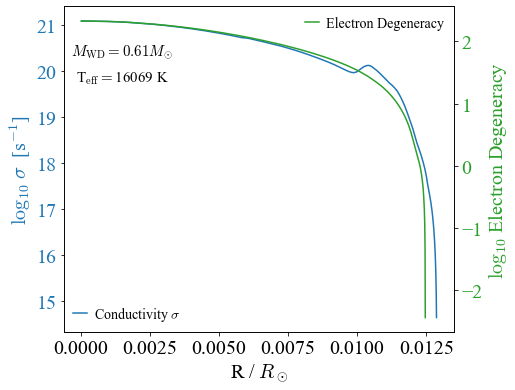

In [389]:
fig, ax1 = plt.subplots()  # Create a new figure and a set of subplots
clight = 2.99792458e10

#ax1.set_xlabel(r'$\log_{10}$ R / $R_\odot$')
ax1.set_xlabel(r'R / $R_\odot$')
ax1.set_ylabel(r'$\log_{10} \; \sigma$  [s$^{-1}$]', color='tab:blue')
ax1.plot(p.radius, np.log10(p.electric_conductivity), label=r'Conductivity $\sigma$', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color for the left y-axis labels
ax1.legend(loc='lower left')

# Second plot (right y-axis)
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'$\log_{10}$ Electron Degeneracy', color='tab:green')  # Label for the right y-axis
ax2.plot(p.radius, np.log10(p.eta), label='Electron Degeneracy', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')  # Color for the right y-axis labels
ax2.legend(loc='upper right')

# Adding an annotation
ax1.annotate(r'$M_{\rm WD} = '+str(mwd)+'M_{\odot}$', xy=(0.15, 0.85), xycoords='axes fraction', fontsize=15, ha='center')
ax1.annotate(r'T$_{\rm eff} = $'+str(teff)+' K', xy=(0.15, 0.77), xycoords='axes fraction', fontsize=15, ha='center')

    

Text(0.15, 0.73, 'T$_{\\rm eff} = $16069 K')

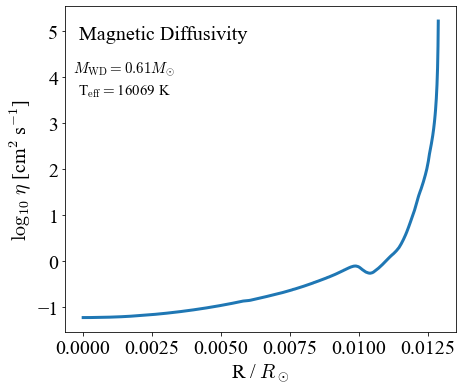

In [390]:
plt.plot(p.radius,np.log10(p.magnetic_diffusivity),lw=3)
#plt.plot(p.radius,np.log10(eta))
plt.xlabel(r'R / $R_\odot$')
plt.ylabel(r'$\log_{10} \; \eta$ [cm$^2$ s$^{-1}$]')

# Adding an annotation
plt.annotate('Magnetic Diffusivity', xy=(0.25, 0.9), xycoords='axes fraction', fontsize=20, ha='center')
plt.annotate(r'$M_{\rm WD} = '+str(mwd)+'M_{\odot}$', xy=(0.15, 0.8), xycoords='axes fraction', fontsize=15, ha='center')
plt.annotate(r'T$_{\rm eff} = $'+str(teff)+' K', xy=(0.15, 0.73), xycoords='axes fraction', fontsize=15, ha='center')



### Calculate the magnetic diffusion time through the star (note [$\eta$] = cm$^2$/s -> [$\tau_{\rm ohm}$] = s)
Again, to determine the Ohmic diffusion timescale for magnetic elements coming from different depths in the star, 
we integrate the diffusion timescale across layers as:
$\tau_{ohm} = \frac{L^2}{\eta} $
$\tau_{ohm,r} = \int_{r}^{R_*} d(r^2 /\eta(r)) \approx \sum_{r}^{R_*}\, 2 \,dr \, r / \eta(r) $

In [391]:
## Total Ohmic Diffusion Time through the star (to be compared with Cummings results)

tau = 0.0
nz = len(p.electric_conductivity)

for k in range(0,nz-1):    
    dr = p.dm[k] / (4.0 * math.pi * rsun**2 * p.radius[k]**2 * 10**p.logRho[k])   
    tau += 2.0 * dr * rsun * p.radius[k] / p.magnetic_diffusivity[k]
    
print(np.log10(tau/(3600*24*365)))

11.015068097752815


In [392]:
## Compare to Cummings et al. 2002 formula

rho_c = 10**(p.logRho[-1])
rho_avg = 3*p.mass[0]*msun/(4*math.pi*(rsun*p.radius[0])**3)

print(rho_c,rho_avg,rho_avg/rho_c,p.radius[0],p.mass[0])

t_cummings=calculate_ohmic_diffusion_time(rho_c, rho_avg, rsun*p.radius[0])

print(np.log10(t_cummings))


3902589.869948473 401321.36493237107 0.1028346247764103 0.012871685689858189 0.6075737435050838
10.030471138401364


In [393]:
## Now we calculate the cumulative Ohmic Diffusion Time, so that we can read the time 
## it takes for a magnetic element to diffuse from a specific part of the star

dtau = np.zeros(nz)
for k in range(0,nz-1):    
    dr = p.dm[k] / (4.0 * math.pi * rsun**2 * p.radius[k]**2 * 10**p.logRho[k])   
    dtau[k] = 2.0 * dr * rsun * p.radius[k] / p.magnetic_diffusivity[k]
   

<ipython-input-379-497e610dfeb0>:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(p.radius,np.log10(dtau))


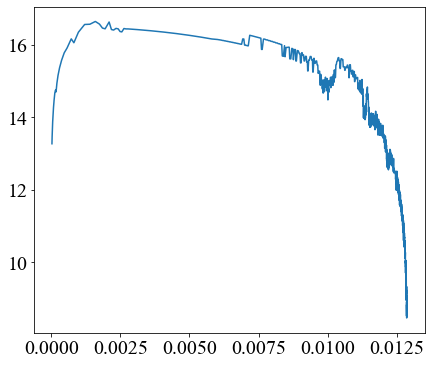

In [379]:
# We see here that due to the higher conductivity in degenerate regions of the star, the Ohmic diffusion time become much faster closer to the stellar surface, where the material is non degenerata
plt.plot(p.radius,np.log10(dtau))

# Calculate the reversed cumulative sum (cumsum_from_end)
tau_ohm = np.cumsum(dtau[::-1])[::-1]


<ipython-input-380-3936f5d2a5c6>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(p.mass-p.mass[nz-1],np.log10(tau_ohm/(3600*24*365)), lw=3)


Text(0, 0.5, '$\\log_{10}$ time / yr')

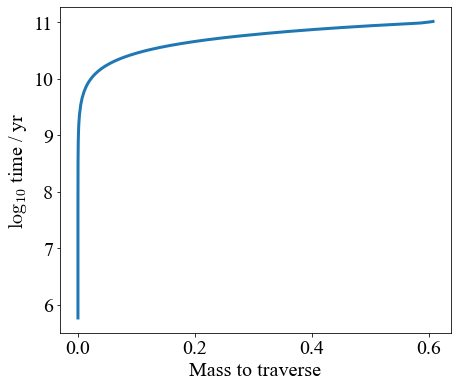

In [380]:
plt.plot(p.mass-p.mass[nz-1],np.log10(tau_ohm/(3600*24*365)), lw=3)
plt.xlabel('Mass to traverse')
plt.ylabel(r'$\log_{10}$ time / yr')

<ipython-input-381-61fc8bf68b4e>:1: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(p.mass-p.mass[nz-1]),np.log10(tau_ohm/(3600*24*365)), lw=3)


Text(0, 0.5, '$\\log_{10}$ time / yr')

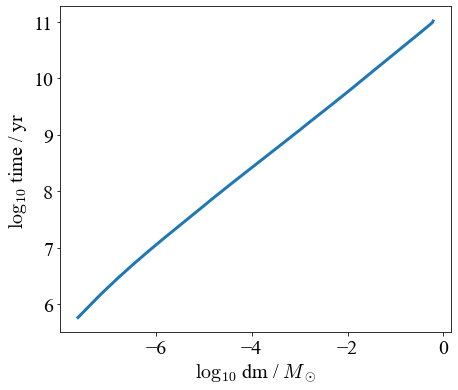

In [381]:
plt.plot(np.log10(p.mass-p.mass[nz-1]),np.log10(tau_ohm/(3600*24*365)), lw=3)
plt.xlabel(r'$\log_{10}$ dm / $M_\odot$')
plt.ylabel(r'$\log_{10}$ time / yr')

<ipython-input-382-72055c2ff82d>:14: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(p.radius, np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')


(5.0, 12.0)

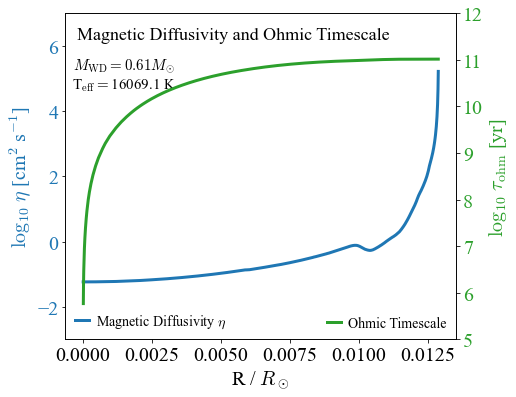

In [382]:



fig, ax1 = plt.subplots()  # Create a new figure and a set of subplots
clight = 2.99792458e10

#ax1.set_xlabel(r'$\log_{10}$ R / $R_\odot$')
ax1.set_xlabel(r'R / $R_\odot$')
ax1.set_ylabel(r'$\log_{10} \; \eta$ [cm$^2$ s$^{-1}$]', color='tab:blue')
ax1.plot(p.radius, np.log10(p.magnetic_diffusivity),lw=3, label=r'Magnetic Diffusivity $\eta$', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color for the left y-axis labels
ax1.legend(loc='lower left')

# Second plot (right y-axis)
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'$\log_{10}$ $\tau_{\rm ohm}$ [yr]', color='tab:green')  # Label for the right y-axis
ax2.plot(p.radius, np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')  # Color for the right y-axis labels
ax2.legend(loc='lower right')

# Adding an annotation
ax1.annotate('Magnetic Diffusivity and Ohmic Timescale', xy=(0.43, 0.92), xycoords='axes fraction', fontsize=18, ha='center')
ax1.annotate(r'$M_{\rm WD} = '+str(mwd)+'M_{\odot}$', xy=(0.15, 0.83), xycoords='axes fraction', fontsize=15, ha='center')
ax1.annotate(r'T$_{\rm eff} = $'+str(teff)+' K', xy=(0.15, 0.77), xycoords='axes fraction', fontsize=15, ha='center')

ax1.set_ylim([-3, 7])
ax2.set_ylim([5, 12])


<ipython-input-383-21065bc3c01f>:14: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(p.mass, np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')


(-0.01, 0.2)

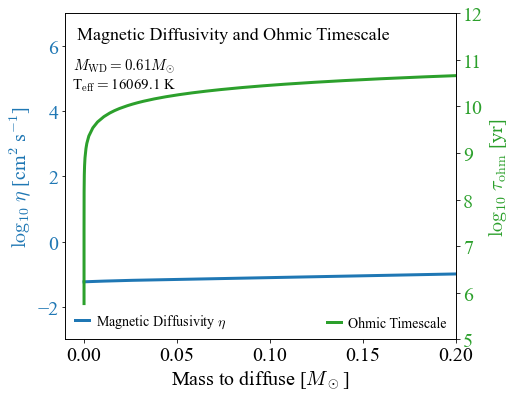

In [383]:
fig, ax1 = plt.subplots()  # Create a new figure and a set of subplots
clight = 2.99792458e10

#ax1.set_xlabel(r'$\log_{10}$ R / $R_\odot$')
ax1.set_xlabel(r'Mass to diffuse [$M_\odot$]')
ax1.set_ylabel(r'$\log_{10} \; \eta$ [cm$^2$ s$^{-1}$]', color='tab:blue')
ax1.plot(p.mass, np.log10(p.magnetic_diffusivity),lw=3, label=r'Magnetic Diffusivity $\eta$', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color for the left y-axis labels
ax1.legend(loc='lower left')

# Second plot (right y-axis)
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'$\log_{10}$ $\tau_{\rm ohm}$ [yr]', color='tab:green')  # Label for the right y-axis
ax2.plot(p.mass, np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')  # Color for the right y-axis labels
ax2.legend(loc='lower right')

# Adding an annotation
ax1.annotate('Magnetic Diffusivity and Ohmic Timescale', xy=(0.43, 0.92), xycoords='axes fraction', fontsize=18, ha='center')
ax1.annotate(r'$M_{\rm WD} = '+str(mwd)+'M_{\odot}$', xy=(0.15, 0.83), xycoords='axes fraction', fontsize=15, ha='center')
ax1.annotate(r'T$_{\rm eff} = $'+str(teff)+' K', xy=(0.15, 0.77), xycoords='axes fraction', fontsize=15, ha='center')

ax1.set_ylim([-3, 7])
ax2.set_ylim([5, 12])
ax1.set_xlim([-0.01, 0.2])
ax2.set_xlim([-0.01, 0.2])


<ipython-input-384-9f1b73de8469>:7: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(p.magnetic_diffusivity),lw=3, label=r'Magnetic Diffusivity $\eta$', color='tab:blue')
<ipython-input-384-9f1b73de8469>:14: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')


(5.0, 12.0)

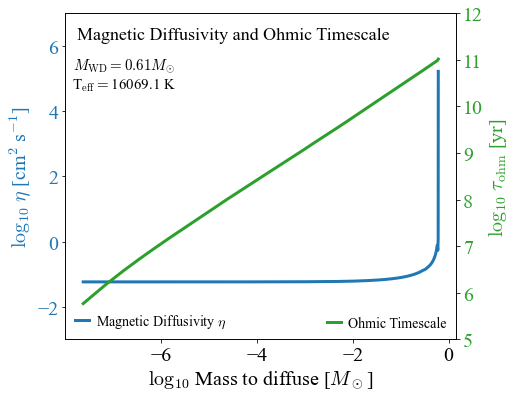

In [384]:
fig, ax1 = plt.subplots()  # Create a new figure and a set of subplots
clight = 2.99792458e10

#ax1.set_xlabel(r'$\log_{10}$ R / $R_\odot$')
ax1.set_xlabel(r'$\log_{10}$ Mass to diffuse [$M_\odot$]')
ax1.set_ylabel(r'$\log_{10} \; \eta$ [cm$^2$ s$^{-1}$]', color='tab:blue')
ax1.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(p.magnetic_diffusivity),lw=3, label=r'Magnetic Diffusivity $\eta$', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color for the left y-axis labels
ax1.legend(loc='lower left')

# Second plot (right y-axis)
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'$\log_{10}$ $\tau_{\rm ohm}$ [yr]', color='tab:green')  # Label for the right y-axis
ax2.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')  # Color for the right y-axis labels
ax2.legend(loc='lower right')

# Adding an annotation
ax1.annotate('Magnetic Diffusivity and Ohmic Timescale', xy=(0.43, 0.92), xycoords='axes fraction', fontsize=18, ha='center')
ax1.annotate(r'$M_{\rm WD} = '+str(mwd)+'M_{\odot}$', xy=(0.15, 0.83), xycoords='axes fraction', fontsize=15, ha='center')
ax1.annotate(r'T$_{\rm eff} = $'+str(teff)+' K', xy=(0.15, 0.77), xycoords='axes fraction', fontsize=15, ha='center')

ax1.set_ylim([-3, 7])
ax2.set_ylim([5, 12])
#ax1.set_xlim([-0.01, 0.2])
#ax2.set_xlim([-0.01, 0.2])


<ipython-input-385-d546ccf763bb>:7: RuntimeWarning: divide by zero encountered in log10
  ax1.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(p.magnetic_diffusivity),lw=3, label=r'Magnetic Diffusivity $\eta$', color='tab:blue')
<ipython-input-385-d546ccf763bb>:18: RuntimeWarning: divide by zero encountered in log10
  ax2.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')


(-5.0, -2.0)

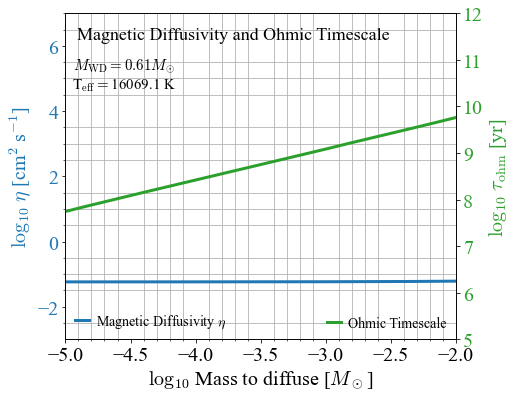

In [385]:
fig, ax1 = plt.subplots()  # Create a new figure and a set of subplots
clight = 2.99792458e10

#ax1.set_xlabel(r'$\log_{10}$ R / $R_\odot$')
ax1.set_xlabel(r'$\log_{10}$ Mass to diffuse [$M_\odot$]')
ax1.set_ylabel(r'$\log_{10} \; \eta$ [cm$^2$ s$^{-1}$]', color='tab:blue')
ax1.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(p.magnetic_diffusivity),lw=3, label=r'Magnetic Diffusivity $\eta$', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')  # Color for the left y-axis labels
ax1.legend(loc='lower left')


ax1.grid(which = "minor")
ax1.minorticks_on()

# Second plot (right y-axis)
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_ylabel(r'$\log_{10}$ $\tau_{\rm ohm}$ [yr]', color='tab:green')  # Label for the right y-axis
ax2.plot(np.log10(p.mass-p.mass[nz-1]), np.log10(tau_ohm/(3600*24*365)),lw=3, label='Ohmic Timescale', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')  # Color for the right y-axis labels
ax2.legend(loc='lower right')

# Adding an annotation
ax1.annotate('Magnetic Diffusivity and Ohmic Timescale', xy=(0.43, 0.92), xycoords='axes fraction', fontsize=18, ha='center')
ax1.annotate(r'$M_{\rm WD} = '+str(mwd)+'M_{\odot}$', xy=(0.15, 0.83), xycoords='axes fraction', fontsize=15, ha='center')
ax1.annotate(r'T$_{\rm eff} = $'+str(teff)+' K', xy=(0.15, 0.77), xycoords='axes fraction', fontsize=15, ha='center')

ax1.set_ylim([-3, 7])
ax2.set_ylim([5, 12])
ax1.set_xlim([-5, -2])
ax2.set_xlim([-5, -2])


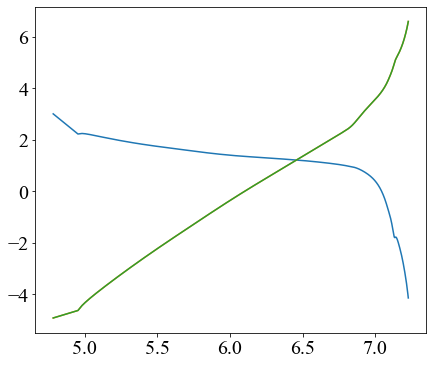

In [386]:
plt.plot(np.log10(p.temperature),np.log10(p.opacity))
plt.plot(np.log10(p.temperature),p.logRho)
plt.plot(np.log10(p.temperature),p.logRho)

In [ ]:
plt.plot(np.log10(p.temperature),np.log10(p.opacity))